##### Import Libraries

In [36]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

##### Load Data

In [37]:
df = pd.read_csv("diabetes.csv")         # Reading the dataset to Data Frame

##### Explore Data

In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.shape

(768, 9)

In [40]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

The statistics about the dataset

In [41]:
y=df["Outcome"]                                                     # predict this (Dependent Variable)
x=df.drop(columns=['Outcome'])

Split the Dataset for Testing and Training

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=df.Outcome)

In [43]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
209,7,184,84,33,0,35.5,0.355,41
176,6,85,78,0,0,31.2,0.382,42
147,2,106,64,35,119,30.5,1.400,34
454,2,100,54,28,105,37.8,0.498,24
636,5,104,74,0,0,28.8,0.153,48


In [44]:
x_train.shape

(537, 8)

In [45]:
y_train.value_counts()

Outcome
0    350
1    187
Name: count, dtype: int64

### Train the model

In [46]:
tree_clf = DecisionTreeClassifier(max_depth=12)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [47]:
tree_clf.classes_

array([0, 1], dtype=int64)

In [48]:
export_graphviz(
                 tree_clf,
                 out_file="diabetes.dot",
                 feature_names=x.columns,
                 class_names=["No","Yes"],
                 rounded=True,
                 filled=True
                )

You can visualize the dot file at <a href="http://www.webgraphviz.com" target="_blank">www.webgraphviz.com</a>

### Accuracy of the model:

In [49]:
print("Training set accuracy: {:.3f}".format(tree_clf.score(x_train, y_train)))
print("Testing set accuracy: {:.3f}".format(tree_clf.score(x_test, y_test)))

Training set accuracy: 1.000
Testing set accuracy: 0.766


In [50]:
actual = y_test
predicted = tree_clf.predict(x_test)

### Test the Model

In [51]:
tree_clf.feature_importances_

array([0.06504217, 0.3285582 , 0.09702604, 0.0238984 , 0.0511895 ,
       0.17971921, 0.14672638, 0.1078401 ])

In [52]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [53]:
import matplotlib.pyplot as plt

<BarContainer object of 8 artists>

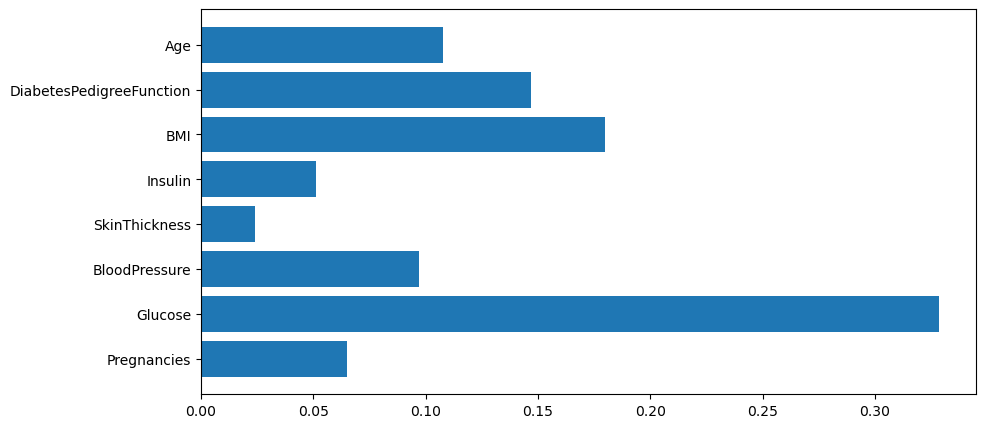

In [54]:
plt.figure(figsize=(10,5))
plt.barh(x.columns,tree_clf.feature_importances_)